In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

https://github.com/scipy/scipy/issues/19232

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/jlandercy/461c36c967c3257d7eaf4f27ecfb9a60/raw/f0dd3e63a06291261c629d657ebb55cb4f2990b6/chromato.csv", sep=";")
x = data["x0"].values
y = data["yb"].values

In [3]:
peaks = signal.find_peaks(y, width=20.)
#peaks = signal.find_peaks(y, prominence=1.)

In [4]:
peaks

(array([ 726, 1297, 1691, 2189, 2945, 3390, 3758, 4279], dtype=int64),
 {'prominences': array([13.46167671, 13.99969829, 15.01796069, 12.48824929, 11.72739421,
         12.56004554, 10.03979127,  8.69610265]),
  'left_bases': array([ 503,  503,  503, 1980, 2773, 3215, 3615, 4004], dtype=int64),
  'right_bases': array([1046, 1476, 3215, 3215, 3215, 4926, 4926, 4926], dtype=int64),
  'widths': array([147.61008396, 135.79017141, 147.63044826, 172.1335768 ,
          60.89290957,  72.01385079,  94.56465009, 135.28674746]),
  'width_heights': array([6.5105502 , 6.8888271 , 7.23222624, 6.10395427, 5.59850917,
         5.99604523, 4.78110177, 4.14248593]),
  'left_ips': array([ 655.85768704, 1229.62465879, 1624.06622795, 2107.71131882,
         2916.32946911, 3352.8763468 , 3712.40414302, 4211.35891641]),
  'right_ips': array([ 803.467771  , 1365.4148302 , 1771.6966762 , 2279.84489562,
         2977.22237867, 3424.89019759, 3806.9687931 , 4346.64566388])})

In [22]:
def clean_base_indices(lefts, rights):
    """Clean peak base limits"""
    _lefts = np.copy(lefts)
    _rights = np.copy(rights)
    for i in range(len(lefts)-1):
        if lefts[i] == lefts[i+1]:
            _lefts[i+1] = rights[i]
        if rights[i] == rights[i+1]:
            _rights[i] = lefts[i+1]
    return _lefts, _rights

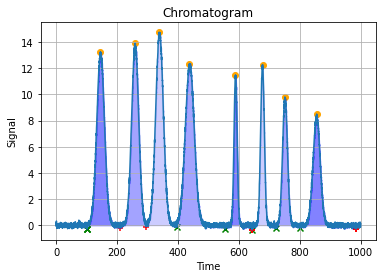

In [8]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.scatter(x[peaks[0]], y[peaks[0]], color="orange")
axe.scatter(x[peaks[1]["left_bases"]], y[peaks[1]["left_bases"]], color="green", marker="x")
axe.scatter(x[peaks[1]["right_bases"]], y[peaks[1]["right_bases"]], color="red", marker="+")
for left, right in zip(peaks[1]["left_bases"], peaks[1]["right_bases"]):
    axe.fill_between(x[left:right], y[left:right], color="blue", alpha=0.20)
axe.set_title("Chromatogram")
axe.set_xlabel("Time")
axe.set_ylabel("Signal")
axe.grid()

In [25]:
(peaks[1]["left_bases"], peaks[1]["right_bases"])

(array([ 503,  503,  503, 1980, 2773, 3215, 3615, 4004], dtype=int64),
 array([1046, 1476, 3215, 3215, 3215, 4926, 4926, 4926], dtype=int64))

In [27]:
lefts, rights = clean_base_indices(peaks[1]["left_bases"], peaks[1]["right_bases"])
lefts, rights

(array([ 503, 1046, 1476, 1980, 2773, 3215, 3615, 4004], dtype=int64),
 array([1046, 1476, 1980, 2773, 3215, 3615, 4004, 4926], dtype=int64))

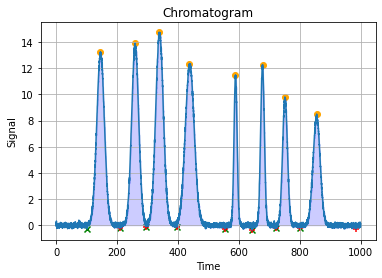

In [28]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.scatter(x[peaks[0]], y[peaks[0]], color="orange")
axe.scatter(x[lefts], y[lefts], color="green", marker="x")
axe.scatter(x[rights], y[rights], color="red", marker="+")
for left, right in zip(lefts, rights):
    axe.fill_between(x[left:right], y[left:right], color="blue", alpha=0.20)
axe.set_title("Chromatogram")
axe.set_xlabel("Time")
axe.set_ylabel("Signal")
axe.grid()

In [29]:
import sys, scipy, numpy; print(scipy.__version__, numpy.__version__, sys.version_info); scipy.show_config()

1.10.1 1.20.3 sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: c:/opt/openblas/if_32/64/include
    lib directory: c:/opt/openblas/if_32/64/lib
    name: openblas
    openblas configuration: USE_64BITINT= DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= PRESCOTT MAX_THREADS=4
    pc file directory: c:/opt/openblas/if_32/64/lib/pkgconfig
    version: 0.3.18
  lapack:
    detection method: pkgconfig
    found: true
    include directory: c:/opt/openblas/if_32/64/include
    lib directory: c:/opt/openblas/if_32/64/lib
    name: openblas
    openblas configuration: USE_64BITINT= DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= PRESCOTT MAX_THREADS=4
    pc file directory: c:/opt/openblas/if_32/64/lib/pkgconfig
    version: 0.3.18
Compilers:
  c:
    commands: cc
    linker: l